## NB for some initial egar plotting

In [2]:
import sys
sys.path.insert(1, '/Users/gr_1/Documents/simplem/')
import simplem
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
import srtm
import ipyleaflet as ipl


ModuleNotFoundError: No module named 'srtm'

In [2]:
from ipyleaflet import Map, basemaps, basemap_to_tiles

m = Map(basemap=basemaps.OpenTopoMap, zoom=1)

m

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [466]:
m.bounds[0]

(26.63763888664592, 93.603515625)

### Generage Bounding box

In [11]:
import geopandas as gpd
basins = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/basins_pt/basins_pt.shp')

In [13]:
basins.geometry.bounds

,minx,miny,maxx,maxy
0,-124.341756,47.550016,-123.900002,47.775616
1,-124.341667,43.354167,-124.062215,43.575000
2,-124.091668,40.695834,-123.679165,41.437499
3,-124.016666,44.416669,-123.766457,44.558334
4,-123.829771,39.300002,-123.704167,39.429169
...,...,...,...,...
511,145.395835,-17.091667,145.629732,-16.716666
512,145.504168,-17.062500,145.662502,-16.820835
513,145.537968,-17.045832,145.762854,-16.750002
514,149.350000,-36.220832,149.579733,-35.970832


In [3]:

for b in basins.geometry.bounds.iterrows():
    lons = [b['minx'],b['maxx']
    lats = [b['maxx'],b['maxy']]
    nx = np.int(np.ceil(np.diff(lons)*1200))
    ny = np.int(np.ceil(np.diff(lats)*1200))
    nx,ny
    geo_elevation_data = srtm.get_data()
    image = geo_elevation_data.get_image(size=(nx, ny),latitude_interval = lats,longitude_interval = lons,max_elevation = 5000,mode='array')

(52257, 1066)

### Deprecate by factor

In [6]:
fact = 1
nx/=fact
ny/=fact

In [7]:
geo_elevation_data = srtm.get_data()
image = geo_elevation_data.get_image(size=(nx, ny),latitude_interval = lats,longitude_interval = lons,max_elevation = 5000,mode='array')


In [16]:
mm,nn = np.shape(image)
mm,nn

(1680, 6428)

In [ ]:
##Get rid of nans
mm,nn = np.shape(image)
for iteration in range(100):
    idx = [1,-1,mm,-mm,mm-1,mm+1,-mm+1,-mm-1]
    c = 0
    nans = np.where(np.isnan(image.ravel()))[0]
    cs = np.zeros(len(nans))
    imsums = np.zeros(len(nans))
    I,J =np.unravel_index(nans,np.shape(image)) 
    #image[I,J] = 0
    for id in idx:
        nansi = nans+id
        nansi[nansi<0] = nans[nansi<0]
        nansi[nansi>=mm*nn] = nans[nansi>=mm*nn]

        es = image.ravel(order='F')[nansi]
        for i in range(len(es)):
            if not(np.isnan(es[i])):
                imsums[i] += es[i]
                cs[i] += 1
    print(len(np.where(cs==0)[0]))
    cs[cs==0] = np.nan
    
    image[I,J] = np.divide(imsums,cs)


In [9]:
nans = np.where(np.isnan(image.ravel(order='F')))[0]
nans

array([], dtype=int64)

In [23]:
4*nn/2.5

10284.8

In [24]:
image = image[:,:int(2.5*nn/4)]

In [21]:
#image=np.flipud(image)

<ipython-input-8-d96dc967eb24>:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([], [])
<ipython-input-8-d96dc967eb24>:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])
/Users/gr_1/opt/miniconda3/lib/python3.8/site-packages/matplotlib/image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/Users/gr_1/opt/miniconda3/lib/python3.8/site-packages/matplotlib/image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/Users/gr_1/opt/miniconda3/lib/python3.8/site-packages/matplotlib/image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_

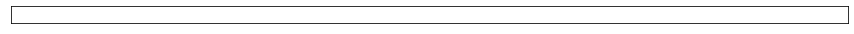

In [8]:
from matplotlib.colors import LightSource
ls = LightSource(azdeg=30, altdeg=50)
shd = ls.shade(image, cmap=plt.get_cmap('gray') , blend_mode='soft')
fig,ax = plt.subplots(figsize=(15,15))
im=plt.imshow(image,cmap = 'terrain')

#im=plt.imshow(shd,alpha=.4)
ax.set_xticks([], [])
ax.set_yticks([], [])
#plt.colorbar(im)
plt.show()

In [66]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
import simplem
a = simplem.fs()
a.set_z(image)
a.sinkfill()
a.slp()
a.stack()
a.acc()
a.chicalc();

here


In [178]:
import matplotlib.pyplot as plt
import copy


[0.267004, 0.004874, 0.329415]

In [207]:
import matplotlib.pyplot as plt

<ipython-input-82-b22a9da30d7d>:3: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([], [])
<ipython-input-82-b22a9da30d7d>:4: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])


[]

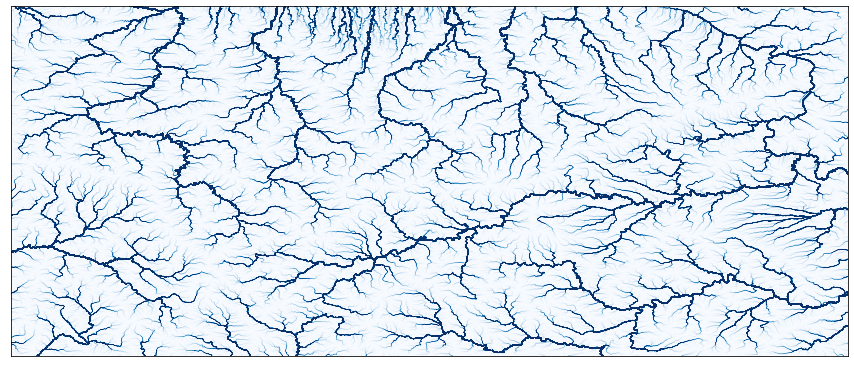

In [82]:
fig,ax = plt.subplots(figsize=(15,15))
plt.imshow(a.A,vmin=0,vmax=1000,cmap="Blues")

ax.set_xticks([], [])
ax.set_yticks([], [])

<ipython-input-213-5f83de910820>:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([], [])
<ipython-input-213-5f83de910820>:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])


[]

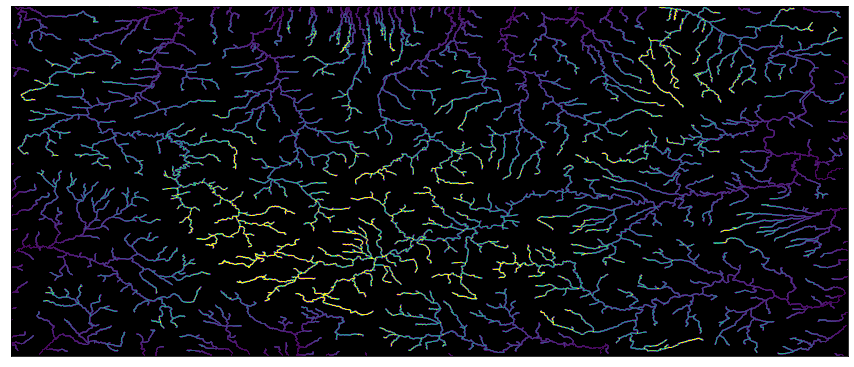

In [213]:
fig,ax = plt.subplots(figsize=(15,15))
chi = a.chi.copy()
chi[a.A<2000] = .00000000010
cmap = copy.deepcopy(plt.cm.viridis)
for i in range(1):
    cmap._lut[i] = [0.0,0.0,0.0,1]
    cmap.colors[i] = [0.0,0.0,0.0]


#chi = np.ma.masked_where(chi <= .000000001, chi)
plt.imshow(chi,vmin=0,vmax=.001,cmap=cmap)
ax.set_xticks([], [])
ax.set_yticks([], [])


<ipython-input-310-eb5164df6e04>:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([], [])
<ipython-input-310-eb5164df6e04>:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])


[]

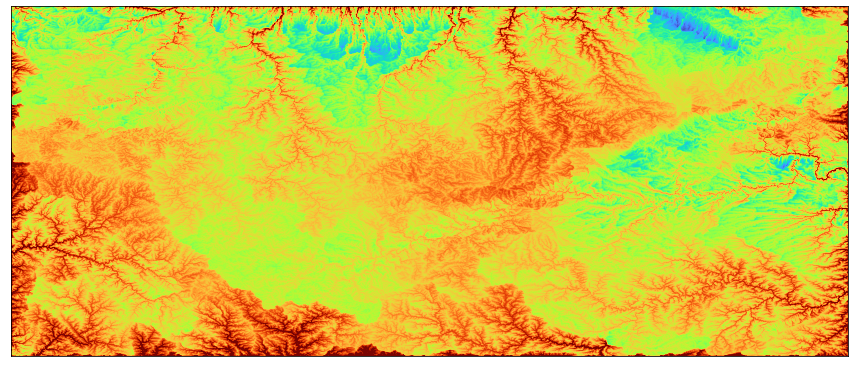

In [310]:
fig,ax = plt.subplots(figsize=(15,15))
chi = a.chi.copy()
z = a.Z.copy()

#chi[chi<=.0005]=1000000000000000000000000
dchi = np.divide(z,chi)
dchi = np.log(dchi)
#dchi[a.A<2000] = np.min(dchi)
cmap = copy.deepcopy(plt.cm.turbo)

#for i in range(1):
    #cmap._lut[i] = [0.0,0.0,0.0,1]
    #cmap.colors[i] = [0.0,0.0,0.0]
    

#chi = np.ma.masked_where(chi <= .000000001, chi)
plt.imshow(dchi,vmax = 12.5,cmap=cmap)
ax.set_xticks([], [])
ax.set_yticks([], [])
#plt.colorbar()

In [292]:
np.max(dchi)

18.770446233596292

In [306]:
import simplem
for i in range(1,100):
    a2= simplem.fs()
    a2.sinkfill()
    a2.slp()
    a2.stack()
    a2.acc()
    a2.erode()
a2.chicalc();

<ipython-input-307-41ed872bad6e>:7: RuntimeWarning: divide by zero encountered in log
  dchi = np.log(dchi)
<ipython-input-307-41ed872bad6e>:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([], [])
<ipython-input-307-41ed872bad6e>:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])


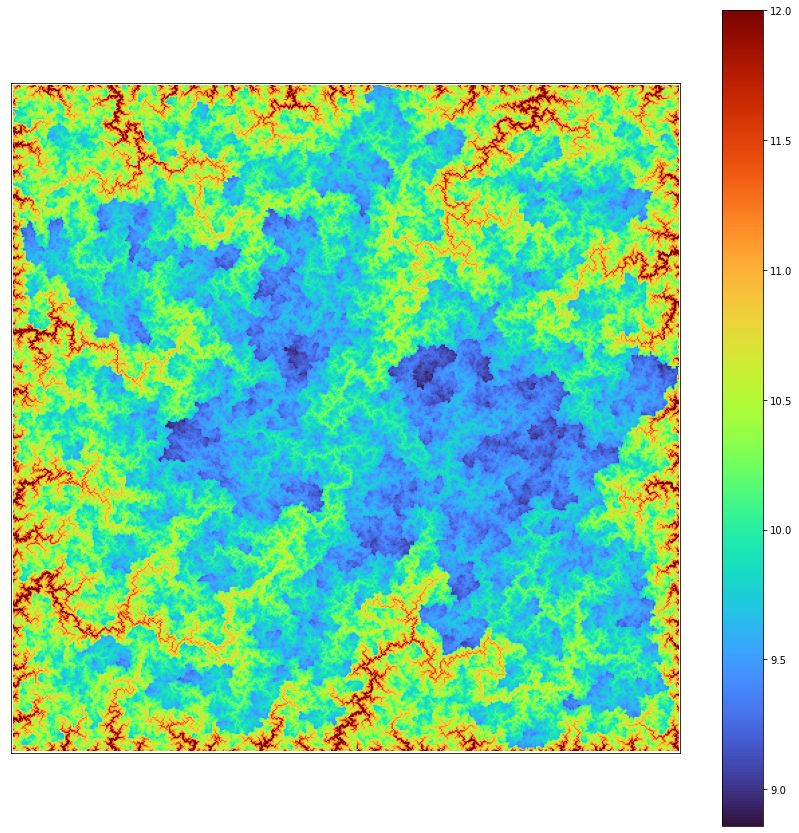

In [307]:
fig,ax = plt.subplots(figsize=(15,15))
chi = a2.chi.copy()
z = a2.Z.copy()

#chi[chi<=.0005]=1000000000000000000000000
dchi = np.divide(z,chi)
dchi = np.log(dchi)
#dchi[a.A<2000] = np.min(dchi)
cmap = copy.deepcopy(plt.cm.turbo)

#for i in range(1):
    #cmap._lut[i] = [0.0,0.0,0.0,1]
    #cmap.colors[i] = [0.0,0.0,0.0]
    

#chi = np.ma.masked_where(chi <= .000000001, chi)
plt.imshow(dchi,vmax = 12,cmap=cmap)
ax.set_xticks([], [])
ax.set_yticks([], [])
plt.colorbar()